In [680]:
# Importing and installing packages

import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.



C:\Users\adity\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)



Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [594]:
# FourSquare Log in 

CLIENT_ID = 'HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG' # your Foursquare ID
CLIENT_SECRET = 'ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN' # your Foursquare Secret
VERSION = '20201009'
limit = 1000,
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG
CLIENT_SECRET:ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN


In [595]:
# London location Co-ordinates

address = 'London'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

51.5073219 -0.1276474


In [615]:
# London Foursquare restaurants link

lon_url = 'https://api.foursquare.com/v2/venues/search?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&ll=51.5073219,-0.1276474&v=20201009&query=Restaurant&limit=1000'
lon_url

'https://api.foursquare.com/v2/venues/search?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&ll=51.5073219,-0.1276474&v=20201009&query=Restaurant&limit=1000'

In [597]:
# London restaurants raw data

lon_results = requests.get(lon_url).json()
lon_results

{'meta': {'code': 200, 'requestId': '5f5a1b4d39ea89224291fbc2'},
 'response': {'venues': [{'id': '4b5344aef964a5200c9527e3',
    'name': 'The Ivy Restaurant',
    'location': {'address': '1-5 West St',
     'crossStreet': 'Litchfield St',
     'lat': 51.51279973860704,
     'lng': -0.12798146580711955,
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.51279973860704,
       'lng': -0.12798146580711955}],
     'distance': 610,
     'postalCode': 'WC2H 9NQ',
     'cc': 'GB',
     'city': 'London',
     'state': 'Greater London',
     'country': 'United Kingdom',
     'formattedAddress': ['1-5 West St (Litchfield St)',
      'London',
      'Greater London',
      'WC2H 9NQ',
      'United Kingdom']},
    'categories': [{'id': '52e81612bcbc57f1066b7a05',
      'name': 'English Restaurant',
      'pluralName': 'English Restaurants',
      'shortName': 'English',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'pri

In [598]:
# London restaurants Dataframe

# assign relevant part of JSON to venues
lon_venues = lon_results['response']['venues']

# tranform venues into a dataframe
lon_dataframe = pd.json_normalize(lon_venues)
lon_dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,venuePage.id,location.neighborhood
0,4b5344aef964a5200c9527e3,The Ivy Restaurant,"[{'id': '52e81612bcbc57f1066b7a05', 'name': 'E...",v-1599740781,False,1-5 West St,Litchfield St,51.512800,-0.127981,"[{'label': 'display', 'lat': 51.51279973860704...",610,WC2H 9NQ,GB,London,Greater London,United Kingdom,"[1-5 West St (Litchfield St), London, Greater ...",NaN,NaN
1,5001b8e6e4b05e79b0b3b84d,Bill's Restaurant,"[{'id': '52e81612bcbc57f1066b7a05', 'name': 'E...",v-1599740781,False,36-44 Brewer St,Lexington St,51.511834,-0.135080,"[{'label': 'display', 'lat': 51.51183377093123...",719,W1F 9TB,GB,London,Greater London,United Kingdom,"[36-44 Brewer St (Lexington St), Soho, Greater...",NaN,NaN
2,4d440bf1c3e5f04d0a219620,Bill's Restaurant,"[{'id': '52e81612bcbc57f1066b7a05', 'name': 'E...",v-1599740781,False,28 St Martin's Courtyard,Upper St Martin's Ln,51.512555,-0.126600,"[{'label': 'display', 'lat': 51.51255465283461...",587,WC2E 9AB,GB,Covent Garden,Greater London,United Kingdom,[28 St Martin's Courtyard (Upper St Martin's L...,NaN,NaN
3,4b9c54b8f964a520206036e3,Hung's Chinese Restaurant | 美食軒,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1599740781,False,27 Wardour St,NaN,51.511278,-0.131953,"[{'label': 'display', 'lat': 51.51127771538517...",531,W1D 6PR,GB,London,Greater London,United Kingdom,"[27 Wardour St, London, Greater London, W1D 6P...",NaN,NaN
4,4c39bcafedba9521cf6cd625,New Loon Fung Chinese Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1599740781,False,42-44 Gerrard St,NaN,51.512039,-0.130371,"[{'label': 'display', 'lat': 51.51203891754673...",557,W1D 5QG,GB,London,Greater London,United Kingdom,"[42-44 Gerrard St, London, Greater London, W1D...",NaN,NaN


In [599]:
# London filtered restaurants list

# keep only columns that include venue name, and anything that is associated with location
lon_filtered_columns = ['name', 'categories'] + [col for col in lon_dataframe.columns if col.startswith('location.')] + ['id']
lon_dataframe_filtered = lon_dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        lon_categories_list = row['categories']
    except:
        lon_categories_list = row['venue.categories']
        
    if len(lon_categories_list) == 0:
        return None
    else:
        return lon_categories_list[0]['name']

# filter the category for each row
lon_dataframe_filtered['categories'] = lon_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
lon_dataframe_filtered.columns = [column.split('.')[-1] for column in lon_dataframe_filtered.columns]

lon_dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,The Ivy Restaurant,English Restaurant,1-5 West St,Litchfield St,51.512800,-0.127981,"[{'label': 'display', 'lat': 51.51279973860704...",610,WC2H 9NQ,GB,London,Greater London,United Kingdom,"[1-5 West St (Litchfield St), London, Greater ...",4b5344aef964a5200c9527e3
1,Bill's Restaurant,English Restaurant,36-44 Brewer St,Lexington St,51.511834,-0.135080,"[{'label': 'display', 'lat': 51.51183377093123...",719,W1F 9TB,GB,London,Greater London,United Kingdom,"[36-44 Brewer St (Lexington St), Soho, Greater...",5001b8e6e4b05e79b0b3b84d
2,Bill's Restaurant,English Restaurant,28 St Martin's Courtyard,Upper St Martin's Ln,51.512555,-0.126600,"[{'label': 'display', 'lat': 51.51255465283461...",587,WC2E 9AB,GB,Covent Garden,Greater London,United Kingdom,[28 St Martin's Courtyard (Upper St Martin's L...,4d440bf1c3e5f04d0a219620
3,Hung's Chinese Restaurant | 美食軒,Chinese Restaurant,27 Wardour St,NaN,51.511278,-0.131953,"[{'label': 'display', 'lat': 51.51127771538517...",531,W1D 6PR,GB,London,Greater London,United Kingdom,"[27 Wardour St, London, Greater London, W1D 6P...",4b9c54b8f964a520206036e3
4,New Loon Fung Chinese Restaurant,Chinese Restaurant,42-44 Gerrard St,NaN,51.512039,-0.130371,"[{'label': 'display', 'lat': 51.51203891754673...",557,W1D 5QG,GB,London,Greater London,United Kingdom,"[42-44 Gerrard St, London, Greater London, W1D...",4c39bcafedba9521cf6cd625
5,Portrait Restaurant,Café,St. Martin's Pl,Trafalgar Sq,51.509259,-0.128202,"[{'label': 'display', 'lat': 51.50925927272873...",219,WC2N 4JJ,GB,London,Greater London,United Kingdom,"[St. Martin's Pl (Trafalgar Sq), London, Great...",4af41e26f964a52024f021e3
6,The Elysee Restaurant and Roof Garden,Greek Restaurant,13 Percy St,NaN,51.518270,-0.132954,"[{'label': 'display', 'lat': 51.51827036363987...",1273,W1T 1DP,GB,London,Greater London,United Kingdom,"[13 Percy St, London, Greater London, W1T 1DP,...",4ac518caf964a520bda520e3
7,C&R Café Restaurant,Malay Restaurant,4-5 Rupert Court,NaN,51.511111,-0.132445,"[{'label': 'display', 'lat': 51.51111126738831...",537,W1D 6DY,GB,Chinatown,Greater London,United Kingdom,"[4-5 Rupert Court, Chinatown, Greater London, ...",4afc9a04f964a5204c2422e3
8,London Chinatown Restaurant,Chinese Restaurant,27 Gerrard St,NaN,51.511507,-0.131810,"[{'label': 'display', 'lat': 51.51150741274579...",547,W1D 6JN,GB,London,Greater London,United Kingdom,"[27 Gerrard St, London, Greater London, W1D 6J...",4ed23e3b2c5bc35059276f87
9,Sapori Café & Restaurant,Café,60 Horseferry Rd,NaN,51.494805,-0.127654,"[{'label': 'display', 'lat': 51.49480549750268...",1393,SW1P 2AF,GB,London,Greater London,United Kingdom,"[60 Horseferry Rd, London, Greater London, SW1...",4bb495885148d13a67ac523b


In [600]:
# London Chinese restaurants list

lon_dataframe_Chi = lon_dataframe_filtered[lon_dataframe_filtered['categories'].str.contains ('Chinese')]
lon_dataframe_Chi

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
3,Hung's Chinese Restaurant | 美食軒,Chinese Restaurant,27 Wardour St,NaN,51.511278,-0.131953,"[{'label': 'display', 'lat': 51.51127771538517...",531,W1D 6PR,GB,London,Greater London,United Kingdom,"[27 Wardour St, London, Greater London, W1D 6P...",4b9c54b8f964a520206036e3
4,New Loon Fung Chinese Restaurant,Chinese Restaurant,42-44 Gerrard St,NaN,51.512039,-0.130371,"[{'label': 'display', 'lat': 51.51203891754673...",557,W1D 5QG,GB,London,Greater London,United Kingdom,"[42-44 Gerrard St, London, Greater London, W1D...",4c39bcafedba9521cf6cd625
8,London Chinatown Restaurant,Chinese Restaurant,27 Gerrard St,NaN,51.511507,-0.131810,"[{'label': 'display', 'lat': 51.51150741274579...",547,W1D 6JN,GB,London,Greater London,United Kingdom,"[27 Gerrard St, London, Greater London, W1D 6J...",4ed23e3b2c5bc35059276f87
11,Kowloon Restaurant and Cakeshop,Chinese Restaurant,21-22 Gerrard St,NaN,51.511503,-0.131904,"[{'label': 'display', 'lat': 51.51150273700102...",550,W1D 6JH,GB,Chinatown,Greater London,United Kingdom,"[21-22 Gerrard St, Chinatown, Greater London, ...",4b483c31f964a520754a26e3
40,Lin's Restaurant & Bar,Chinese Restaurant,134 Southwark St,Hopton St,51.506318,-0.102086,"[{'label': 'display', 'lat': 51.50631776350921...",1774,SE1 0SW,GB,London,Greater London,United Kingdom,"[134 Southwark St (Hopton St), London, Greater...",5783cb5c498e3c23309460e6


In [601]:
# London Indian restaurants list

lon_dataframe_Ind = lon_dataframe_filtered[lon_dataframe_filtered['categories'].str.contains("Ind")]
lon_dataframe_Ind

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
12,India India Restaurant,Indian Restaurant,8 Crane Court,NaN,51.507193,-0.127866,"[{'label': 'display', 'lat': 51.50719323477933...",20,EC4A 2EJ,GB,London,Greater London,United Kingdom,"[8 Crane Court, London, Greater London, EC4A 2...",5b619132d03360002c66b9e4
13,Shapur Indian Restaurant,Indian Restaurant,149 Strand,NaN,51.511507,-0.118414,"[{'label': 'display', 'lat': 51.51150689149121...",791,WC2R 1JA,GB,London,Greater London,United Kingdom,"[149 Strand, London, Greater London, WC2R 1JA,...",59832ed68496ca5052ea37bc
24,The Thames Restaurant,Indian Restaurant,79 Waterloo Rd,NaN,51.503948,-0.111909,"[{'label': 'display', 'lat': 51.50394774265021...",1153,SE1 8UD,GB,London,Greater London,United Kingdom,"[79 Waterloo Rd, London, Greater London, SE1 8...",4b6b2cf2f964a520a1f72be3
27,Khan's Restaurant,Indian Restaurant,159 Lavender Hill,NaN,51.506646,-0.126997,"[{'label': 'display', 'lat': 51.50664565161931...",87,SW11 5QH,GB,Battersea,Greater London,United Kingdom,"[159 Lavender Hill, Battersea, Greater London,...",5cad5f7289e490002c472ba4
42,Madhu's Restaurant,Indian Restaurant,"39 South Road, Southall",NaN,51.508235,-0.126246,"[{'label': 'display', 'lat': 51.50823496018339...",140,UB1 1SW,GB,London,Greater London,United Kingdom,"[39 South Road, Southall, London, Greater Lond...",5dbe5512aff6dc00079671ff
47,Maharani Restaurant,Indian Restaurant,"177 Clapham High Street, Clapham",NaN,51.508462,-0.125860,"[{'label': 'display', 'lat': 51.50846199973846...",177,SW4 7TB,GB,London,Greater London,United Kingdom,"[177 Clapham High Street, Clapham, London, Gre...",5dda1c983c39820007a5fd00


In [602]:
# London Bar & restaurants list

lon_dataframe_Bar = lon_dataframe_filtered[lon_dataframe_filtered['categories'].str.contains("Bar")] 
lon_dataframe_Bar

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
23,Bloomsbury St Bar & Restaurant,Hotel Bar,9 Bloomsbury St,NaN,51.517482,-0.127452,"[{'label': 'display', 'lat': 51.51748222734402...",1131,WC1B 3LB,GB,London,Greater London,United Kingdom,"[9 Bloomsbury St, London, Greater London, WC1B...",4cbf580f985aa35d2c6e4612
29,Oscar Bar & Restaurant,Hotel Bar,15 Charlotte St,Charlotte Street Hotel,51.518488,-0.134716,"[{'label': 'display', 'lat': 51.51848817973544...",1335,W1T 1RJ,GB,London,Greater London,United Kingdom,"[15 Charlotte St (Charlotte Street Hotel), Lon...",4ac518dcf964a52054a920e3
31,The Cut Bar and Restaurant,Bar,Young Vic Theatre,66 The Cut,51.503061,-0.107474,"[{'label': 'display', 'lat': 51.50306103945989...",1476,SE1 8LZ,GB,Southwark,Greater London,United Kingdom,"[Young Vic Theatre (66 The Cut), Southwark, Gr...",4ac518c4f964a5206fa420e3
32,Jamies Wine Bar & Restaurant,Wine Bar,36 Tudor St,NaN,51.512614,-0.108156,"[{'label': 'display', 'lat': 51.51261390570899...",1473,NaN,GB,London,Greater London,United Kingdom,"[36 Tudor St, London, Greater London, United K...",520ca786e305d5caf4fac24a


In [649]:
# London all restaurants map

lon_venues_t_map = folium.Map(location=[51.5073219, -0.1276474], zoom_start=13) # generate map centred around the london bridge

# add a black circle marker to represent london bridge
folium.features.CircleMarker(
    [latitude, longitude],
    color='black',
    popup='Jagadamba Junction',
    fill = True,
    fill_color = 'black',
    fill_opacity = 0.6
).add_to(lon_venues_t_map)

# add the restaurants as blue circle markers
for lat, lng, label in zip(lon_dataframe_filtered.lat, lon_dataframe_filtered.lng, lon_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(lon_venues_t_map)

# display map
lon_venues_t_map

In [603]:
# London Classified restaurants map

lon_venues_map = folium.Map(location=[51.5073219, -0.1276474], zoom_start=13) # generate map centred around the london bridge

# add a red circle marker to represent the london bridge
folium.features.CircleMarker(
    [latitude, longitude],
    color='black',
    popup='London Bridge',
    fill = True,
    fill_color = 'black',
    fill_opacity = 0.6
).add_to(lon_venues_map)

# add the Chinese restaurants as blue circle markers
for lat, lng, label in zip(lon_dataframe_Chi.lat, lon_dataframe_Chi.lng, lon_dataframe_Chi.categories):
    folium.features.CircleMarker(
        [lat, lng],
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(lon_venues_map)
    
# add the Indian restaurants as blue circle markers
for lat, lng, label in zip(lon_dataframe_Ind.lat, lon_dataframe_Ind.lng, lon_dataframe_Ind.categories):
    folium.features.CircleMarker(
        [lat, lng],
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(lon_venues_map)
    
# add the bar & restaurants as green circle markers
for lat, lng, label in zip(lon_dataframe_Bar.lat, lon_dataframe_Bar.lng, lon_dataframe_Bar.categories):
    folium.features.CircleMarker(
        [lat, lng],
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(lon_venues_map)    

# display map
lon_venues_map

In [604]:
# Visakhapatnam map coordinates

address = 'Visakhapatnam'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

17.7231276 83.3012842


In [616]:
# Visakhapatnam Foursqusre restaurants link

vsp_url = 'https://api.foursquare.com/v2/venues/search?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&ll=17.7231276,83.3012842&v=20201009&query=restaurant&limit=1000'
vsp_url

'https://api.foursquare.com/v2/venues/search?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&ll=17.7231276,83.3012842&v=20201009&query=restaurant&limit=1000'

In [617]:
# Visakhapatnam restaurants raw data

vsp_results = requests.get(vsp_url).json()
vsp_results

{'meta': {'code': 200, 'requestId': '5f5a2075e0d2bb5ca45b7654'},
 'response': {'venues': [{'id': '4de9f57eb0fb8293f7c79117',
    'name': 'Satyam Restaurant',
    'location': {'address': 'Dwarakanagar',
     'crossStreet': '1st lane',
     'lat': 17.726000608032393,
     'lng': 83.30300142687217,
     'labeledLatLngs': [{'label': 'display',
       'lat': 17.726000608032393,
       'lng': 83.30300142687217}],
     'distance': 368,
     'cc': 'IN',
     'city': 'Vizag',
     'state': 'Andhra Pradesh',
     'country': 'India',
     'formattedAddress': ['Dwarakanagar (1st lane)',
      'Vizag',
      'Andhra Pradesh',
      'India']},
    'categories': [{'id': '4bf58dd8d48988d10f941735',
      'name': 'Indian Restaurant',
      'pluralName': 'Indian Restaurants',
      'shortName': 'Indian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1599742232',
    'hasPerk': False},
   {'id': '4f0

In [618]:
# Visakhapatnam restaurants dataset

# assign relevant part of JSON to venues
vsp_venues = vsp_results['response']['venues']

# tranform venues into a dataframe
vsp_dataframe = pd.json_normalize(vsp_venues)
vsp_dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.postalCode
0,4de9f57eb0fb8293f7c79117,Satyam Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1599742232,False,Dwarakanagar,1st lane,17.726001,83.303001,"[{'label': 'display', 'lat': 17.72600060803239...",368,IN,Vizag,Andhra Pradesh,India,"[Dwarakanagar (1st lane), Vizag, Andhra Prades...",NaN
1,4f056f0bb634a88a850f2817,Paradise Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1599742232,False,NaN,NaN,17.712052,83.301600,"[{'label': 'display', 'lat': 17.71205177581347...",1233,IN,Vizag,Andhra Pradesh,India,"[Vizag, Andhra Pradesh, India]",NaN
2,4e20632b52b1f82ffb933985,Amaravathi Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",v-1599742232,False,Dabagardens,NaN,17.720437,83.303142,"[{'label': 'display', 'lat': 17.72043739654407...",358,IN,Vizag,Andhra Pradesh,India,"[Dabagardens, Vizag, Andhra Pradesh, India]",NaN
3,5acf505e6bd36b1c0a36834a,Helapuri Restaurant,"[{'id': '54135bf5e4b08f3d2429dfdf', 'name': 'I...",v-1599742232,False,NaN,NaN,17.726034,83.303200,"[{'label': 'display', 'lat': 17.726034, 'lng':...",382,IN,Vizag,Andhra Pradesh,India,"[Vizag 530016, Andhra Pradesh, India]",530016
4,580c6ff238fa3555d9819eb0,kanhaji family restaurant,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",v-1599742232,False,NaN,NaN,17.720208,83.297904,"[{'label': 'display', 'lat': 17.720208, 'lng':...",483,IN,NaN,NaN,India,[India],NaN


In [619]:
# Visakhapatnam filtered restaurants list

# keep only columns that include venue name, and anything that is associated with location
vsp_filtered_columns = ['name', 'categories'] + [col for col in vsp_dataframe.columns if col.startswith('location.')] + ['id']
vsp_dataframe_filtered = vsp_dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        vsp_categories_list = row['categories']
    except:
        vsp_categories_list = row['venue.categories']
        
    if len(vsp_categories_list) == 0:
        return None
    else:
        return vsp_categories_list[0]['name']

# filter the category for each row
vsp_dataframe_filtered['categories'] = vsp_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
vsp_dataframe_filtered.columns = [column.split('.')[-1] for column in vsp_dataframe_filtered.columns]

vsp_dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Satyam Restaurant,Indian Restaurant,Dwarakanagar,1st lane,17.726001,83.303001,"[{'label': 'display', 'lat': 17.72600060803239...",368,NaN,IN,Vizag,Andhra Pradesh,India,"[Dwarakanagar (1st lane), Vizag, Andhra Prades...",4de9f57eb0fb8293f7c79117
1,Paradise Restaurant,Indian Restaurant,NaN,NaN,17.712052,83.301600,"[{'label': 'display', 'lat': 17.71205177581347...",1233,NaN,IN,Vizag,Andhra Pradesh,India,"[Vizag, Andhra Pradesh, India]",4f056f0bb634a88a850f2817
2,Amaravathi Restaurant,Indian Restaurant,Dabagardens,NaN,17.720437,83.303142,"[{'label': 'display', 'lat': 17.72043739654407...",358,NaN,IN,Vizag,Andhra Pradesh,India,"[Dabagardens, Vizag, Andhra Pradesh, India]",4e20632b52b1f82ffb933985
3,Helapuri Restaurant,Indian Chinese Restaurant,NaN,NaN,17.726034,83.303200,"[{'label': 'display', 'lat': 17.726034, 'lng':...",382,530016,IN,Vizag,Andhra Pradesh,India,"[Vizag 530016, Andhra Pradesh, India]",5acf505e6bd36b1c0a36834a
4,kanhaji family restaurant,Vegetarian / Vegan Restaurant,NaN,NaN,17.720208,83.297904,"[{'label': 'display', 'lat': 17.720208, 'lng':...",483,NaN,IN,NaN,NaN,India,[India],580c6ff238fa3555d9819eb0
5,Anupama Lodging & Restaurant,Indian Restaurant,Near Diamond Park,Dwarakanagar,17.727495,83.303236,"[{'label': 'display', 'lat': 17.72749530846722...",528,NaN,IN,Vishakhapatnam,Andra Pradesh,India,"[Near Diamond Park (Dwarakanagar), Vishakhapat...",501dde91e4b0442465e093f3
6,Blue Sea Restaurant,Indian Restaurant,NaN,NaN,17.724521,83.306767,"[{'label': 'display', 'lat': 17.72452065380642...",601,NaN,IN,NaN,NaN,India,[India],4e350bd6d22d86185a684420
7,"Vaishali Restaurant, Hotel Meghalaya",Vegetarian / Vegan Restaurant,NaN,NaN,17.723561,83.308632,"[{'label': 'display', 'lat': 17.72356109981353...",780,NaN,IN,NaN,NaN,India,[India],4f21088ce4b0628b53fd77db
8,Spice Otel İtalyan Restaurant,Italian Restaurant,Spice Otel,NaN,17.715597,83.302917,"[{'label': 'display', 'lat': 17.71559715270996...",855,NaN,IN,NaN,NaN,India,"[Spice Otel, India]",5601b777498e1274411ec206
9,Jollee Bee Restaurant,Indian Restaurant,#10-1-24,"Velanki Plaza, Asilmetta",17.724425,83.309786,"[{'label': 'display', 'lat': 17.72442475647363...",912,530003,IN,Vizag,Andhra Pradesh,India,"[#10-1-24 (Velanki Plaza, Asilmetta), Vizag 53...",51bad751498e4c49517cb53a


In [622]:
# Visakhapatnam Chinese restaurants

vsp_dataframe_Chi = vsp_dataframe_filtered[vsp_dataframe_filtered['categories'].str.contains ('Chinese', na=False)]
vsp_dataframe_Chi

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
3,Helapuri Restaurant,Indian Chinese Restaurant,NaN,NaN,17.726034,83.303200,"[{'label': 'display', 'lat': 17.726034, 'lng':...",382,530016,IN,Vizag,Andhra Pradesh,India,"[Vizag 530016, Andhra Pradesh, India]",5acf505e6bd36b1c0a36834a
25,Seven eleven restaurant,Chinese Restaurant,Near Satyam and Wipro Junction,Gandhinagar,17.734334,83.313175,"[{'label': 'display', 'lat': 17.7343338307034,...",1773,530013,IN,Vizag,Andhra Pradesh,India,"[Near Satyam and Wipro Junction (Gandhinagar),...",53b6a776498e3b8ad1ea41e8
31,Chinese Restaurant,Chinese Restaurant,NaN,Seethammadhara,17.744709,83.308851,"[{'label': 'display', 'lat': 17.74470934853887...",2532,NaN,IN,Vizag,Andhra Pradesh,India,"[Seethammadhara, Vizag, Andhra Pradesh, India]",4f7db478e4b0bf87a9cf130c
34,G Silver Spoon Restaurant,Chinese Restaurant,NaN,NaN,17.715135,83.324679,"[{'label': 'display', 'lat': 17.715135, 'lng':...",2635,NaN,IN,NaN,NaN,India,[India],518e7aac498e36297f9d5604


In [623]:
# Visakhapatnam Indian restaurants list

vsp_dataframe_Ind = vsp_dataframe_filtered[vsp_dataframe_filtered['categories'].str.contains("Ind", na=False)]
vsp_dataframe_Ind

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,Satyam Restaurant,Indian Restaurant,Dwarakanagar,1st lane,17.726001,83.303001,"[{'label': 'display', 'lat': 17.72600060803239...",368,NaN,IN,Vizag,Andhra Pradesh,India,"[Dwarakanagar (1st lane), Vizag, Andhra Prades...",4de9f57eb0fb8293f7c79117
1,Paradise Restaurant,Indian Restaurant,NaN,NaN,17.712052,83.301600,"[{'label': 'display', 'lat': 17.71205177581347...",1233,NaN,IN,Vizag,Andhra Pradesh,India,"[Vizag, Andhra Pradesh, India]",4f056f0bb634a88a850f2817
2,Amaravathi Restaurant,Indian Restaurant,Dabagardens,NaN,17.720437,83.303142,"[{'label': 'display', 'lat': 17.72043739654407...",358,NaN,IN,Vizag,Andhra Pradesh,India,"[Dabagardens, Vizag, Andhra Pradesh, India]",4e20632b52b1f82ffb933985
3,Helapuri Restaurant,Indian Chinese Restaurant,NaN,NaN,17.726034,83.303200,"[{'label': 'display', 'lat': 17.726034, 'lng':...",382,530016,IN,Vizag,Andhra Pradesh,India,"[Vizag 530016, Andhra Pradesh, India]",5acf505e6bd36b1c0a36834a
5,Anupama Lodging & Restaurant,Indian Restaurant,Near Diamond Park,Dwarakanagar,17.727495,83.303236,"[{'label': 'display', 'lat': 17.72749530846722...",528,NaN,IN,Vishakhapatnam,Andra Pradesh,India,"[Near Diamond Park (Dwarakanagar), Vishakhapat...",501dde91e4b0442465e093f3
6,Blue Sea Restaurant,Indian Restaurant,NaN,NaN,17.724521,83.306767,"[{'label': 'display', 'lat': 17.72452065380642...",601,NaN,IN,NaN,NaN,India,[India],4e350bd6d22d86185a684420
9,Jollee Bee Restaurant,Indian Restaurant,#10-1-24,"Velanki Plaza, Asilmetta",17.724425,83.309786,"[{'label': 'display', 'lat': 17.72442475647363...",912,530003,IN,Vizag,Andhra Pradesh,India,"[#10-1-24 (Velanki Plaza, Asilmetta), Vizag 53...",51bad751498e4c49517cb53a
12,Bombay Restaurant,Indian Restaurant,NaN,NaN,17.714009,83.297407,"[{'label': 'display', 'lat': 17.71400856648885...",1095,NaN,IN,NaN,NaN,India,[India],525ac668498e2e08669e0a36
14,Vista Restaurant,Indian Restaurant,The Park Hotel,NaN,17.721152,83.336873,"[{'label': 'display', 'lat': 17.72115199017903...",3780,NaN,IN,NaN,NaN,India,"[The Park Hotel, India]",5121fb18e4b048432a5962e3
15,Sai Aahar Veg Restaurant,Indian Restaurant,NaN,NaN,17.718666,83.311217,"[{'label': 'display', 'lat': 17.71866619005111...",1164,NaN,IN,NaN,NaN,India,[India],519c3bf2498e86f156151c14


In [624]:
# Visakhapatnam Bar & restaurants list

vsp_dataframe_Bar = vsp_dataframe_filtered[vsp_dataframe_filtered['categories'].str.contains("Bar", na=False)]
vsp_dataframe_Bar

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
23,Sai Krishna Bar & Restaurant,Bar,NaN,NaN,17.737822,83.304115,"[{'label': 'display', 'lat': 17.73782157897949...",1663,NaN,IN,NaN,NaN,India,[India],4f6df335e4b01489ba15245a
38,Zoom Bar,Bar,NaN,NaN,17.707981,83.312778,"[{'label': 'display', 'lat': 17.70798084287164...",2080,NaN,IN,Vizag,Andhra Pradesh,India,"[Vizag, Andhra Pradesh, India]",50a8a8a6e4b0740a1864b031


In [650]:
# Visakhapatnam all restaurants map

vsp_venues_t_map = folium.Map(location=[17.7231276, 83.3012842], zoom_start=13) # generate map centred around the Jagadamba Junction

# add a black circle marker to represent Jagadamba Junction
folium.features.CircleMarker(
    [latitude, longitude],
    color='black',
    popup='Jagadamba Junction',
    fill = True,
    fill_color = 'black',
    fill_opacity = 0.6
).add_to(vsp_venues_t_map)

# add the restaurants as blue circle markers
for lat, lng, label in zip(vsp_dataframe_filtered.lat, vsp_dataframe_filtered.lng, vsp_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(vsp_venues_t_map)

# display map
vsp_venues_t_map

In [625]:
# Visakhapatnam Classified restaurants map

vsp_venues_map = folium.Map(location=[17.7231276, 83.3012842], zoom_start=13) # generate map centred around the Jagadamba Junction

# add a red circle marker to represent Jagadamba Junction
folium.features.CircleMarker(
    [latitude, longitude],
    color='black',
    popup='Jagadamba Junction',
    fill = True,
    fill_color = 'black',
    fill_opacity = 0.6
).add_to(vsp_venues_map)

# add the Chinese restaurants as blue circle markers
for lat, lng, label in zip(vsp_dataframe_Chi.lat, vsp_dataframe_Chi.lng, vsp_dataframe_Chi.categories):
    folium.features.CircleMarker(
        [lat, lng],
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(vsp_venues_map)
# add the restaurants as blue circle markers
for lat, lng, label in zip(vsp_dataframe_Ind.lat, vsp_dataframe_Ind.lng, vsp_dataframe_Ind.categories):
    folium.features.CircleMarker(
        [lat, lng],
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(vsp_venues_map)
 # add the restaurants as blue circle markers
for lat, lng, label in zip(vsp_dataframe_Bar.lat, vsp_dataframe_Bar.lng, vsp_dataframe_Bar.categories):
    folium.features.CircleMarker(
        [lat, lng],
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(vsp_venues_map)   
     
# display map
vsp_venues_map

In [635]:
# New York co-ordinates

address = 'New York'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
# New York all restaurants mapprint(latitude, longitude)

40.7127281 -74.0060152


In [636]:
# New York foursquarel restaurants link

ny_url = 'https://api.foursquare.com/v2/venues/search?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&ll=40.7127281,-74.0060152&v=20201009&query=Restaurant&limit=1000'
ny_url

'https://api.foursquare.com/v2/venues/search?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&ll=40.7127281,-74.0060152&v=20201009&query=Restaurant&limit=1000'

In [637]:
# New York all restaurants raw data

ny_results = requests.get(ny_url).json()
ny_results

{'meta': {'code': 200, 'requestId': '5f5a219b221cc778cc8fec42'},
 'response': {'venues': [{'id': '49f125dcf964a52091691fe3',
    'name': "O'Hara's Restaurant & Pub",
    'location': {'address': '120 Cedar St',
     'crossStreet': 'at Greenwich St.',
     'lat': 40.70989378141622,
     'lng': -74.01283563128297,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.70989378141622,
       'lng': -74.01283563128297},
      {'label': 'entrance', 'lat': 40.709559, 'lng': -74.012621}],
     'distance': 656,
     'postalCode': '10006',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['120 Cedar St (at Greenwich St.)',
      'New York, NY 10006',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d11b941735',
      'name': 'Pub',
      'pluralName': 'Pubs',
      'shortName': 'Pub',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/nightlife/pub_',
       'suffix': '.png'},
      'prim

In [638]:
# New York all restaurants dataframe

# assign relevant part of JSON to venues
ny_venues = ny_results['response']['venues']

# tranform venues into a dataframe
ny_dataframe = pd.json_normalize(ny_venues)
ny_dataframe.head()

,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,...,location.country,location.formattedAddress,venuePage.id,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.neighborhood
0,49f125dcf964a52091691fe3,O'Hara's Restaurant & Pub,"[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",v-1599742895,False,120 Cedar St,at Greenwich St.,40.709894,-74.012836,"[{'label': 'display', 'lat': 40.70989378141622...",...,United States,"[120 Cedar St (at Greenwich St.), New York, NY...",93216281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3fd66200f964a520d5e31ee3,Jing Fong Restaurant 金豐大酒樓,"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",v-1599742895,False,20 Elizabeth St,btwn Bayard & Canal St,40.715881,-73.997209,"[{'label': 'display', 'lat': 40.7158812029412,...",...,United States,"[20 Elizabeth St (btwn Bayard & Canal St), New...",89860853,296411,https://www.seamless.com/menu/jing-fong-restau...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN
2,45e5c256f964a52046431fe3,Mudville Restaurant & Tap House,"[{'id': '4bf58dd8d48988d14c941735', 'name': 'W...",v-1599742895,False,126 Chambers St,btwn W Broadway & Church St,40.715336,-74.008881,"[{'label': 'display', 'lat': 40.71533575723845...",...,United States,[126 Chambers St (btwn W Broadway & Church St)...,43156651,299726,https://www.seamless.com/menu/mudville-restaur...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN
3,3fd66200f964a520ece31ee3,Golden Unicorn Restaurant 麒麟金閣,"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",v-1599742895,False,18 E Broadway,at Catherine St,40.713629,-73.997230,"[{'label': 'display', 'lat': 40.71362850464683...",...,United States,"[18 E Broadway (at Catherine St), New York, NY...",72966848,2197825,https://www.seamless.com/menu/golden-unicorn-b...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN
4,3fd66200f964a520ceea1ee3,Deluxe Green Bo Restaurant,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1599742895,False,66 Bayard St,btwn Elizabeth & Mott St,40.715545,-73.998137,"[{'label': 'display', 'lat': 40.71554491813315...",...,United States,"[66 Bayard St (btwn Elizabeth & Mott St), New ...",348599123,546663,https://www.seamless.com/menu/deluxe-green-bo-...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN


In [639]:
# New York filtered restaurants list

# keep only columns that include venue name, and anything that is associated with location
ny_filtered_columns = ['name', 'categories'] + [col for col in ny_dataframe.columns if col.startswith('location.')] + ['id']
ny_dataframe_filtered = ny_dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        ny_categories_list = row['categories']
    except:
        ny_categories_list = row['venue.categories']
        
    if len(ny_categories_list) == 0:
        return None
    else:
        return ny_categories_list[0]['name']

# filter the category for each row
ny_dataframe_filtered['categories'] = ny_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
ny_dataframe_filtered.columns = [column.split('.')[-1] for column in ny_dataframe_filtered.columns]

ny_dataframe_filtered

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
0,O'Hara's Restaurant & Pub,Pub,120 Cedar St,at Greenwich St.,40.709894,-74.012836,"[{'label': 'display', 'lat': 40.70989378141622...",656,10006,US,New York,NY,United States,"[120 Cedar St (at Greenwich St.), New York, NY...",49f125dcf964a52091691fe3
1,Jing Fong Restaurant 金豐大酒樓,Dim Sum Restaurant,20 Elizabeth St,btwn Bayard & Canal St,40.715881,-73.997209,"[{'label': 'display', 'lat': 40.7158812029412,...",821,10013,US,New York,NY,United States,"[20 Elizabeth St (btwn Bayard & Canal St), New...",3fd66200f964a520d5e31ee3
2,Mudville Restaurant & Tap House,Wings Joint,126 Chambers St,btwn W Broadway & Church St,40.715336,-74.008881,"[{'label': 'display', 'lat': 40.71533575723845...",377,10007,US,New York,NY,United States,[126 Chambers St (btwn W Broadway & Church St)...,45e5c256f964a52046431fe3
3,Golden Unicorn Restaurant 麒麟金閣,Dim Sum Restaurant,18 E Broadway,at Catherine St,40.713629,-73.997230,"[{'label': 'display', 'lat': 40.71362850464683...",748,10002,US,New York,NY,United States,"[18 E Broadway (at Catherine St), New York, NY...",3fd66200f964a520ece31ee3
4,Deluxe Green Bo Restaurant,Chinese Restaurant,66 Bayard St,btwn Elizabeth & Mott St,40.715545,-73.998137,"[{'label': 'display', 'lat': 40.71554491813315...",734,10013,US,New York,NY,United States,"[66 Bayard St (btwn Elizabeth & Mott St), New ...",3fd66200f964a520ceea1ee3
5,Amore's Pizza Restaurant,Pizza Place,147 Chambers St,Hudson Street,40.715860,-74.009888,"[{'label': 'display', 'lat': 40.71585960614924...",477,10007,US,New York,NY,United States,"[147 Chambers St (Hudson Street), New York, NY...",4bc238adf8219c744286b410
6,Acqua Restaurant NYC,Italian Restaurant,21 Peck Slip,at Water St,40.708224,-74.001769,"[{'label': 'display', 'lat': 40.70822431135818...",616,10038,US,New York,NY,United States,"[21 Peck Slip (at Water St), New York, NY 1003...",4a436c34f964a52085a61fe3
7,TJ Byrnes Bar and Restaurant,Restaurant,77 Fulton St,Gold St,40.709233,-74.003747,"[{'label': 'display', 'lat': 40.70923312629616...",433,10038,US,New York,NY,United States,"[77 Fulton St (Gold St), New York, NY 10038, U...",4b4fdfc8f964a520801827e3
8,Sun Sai Gai Restaurant,Chinese Restaurant,220 Canal St,at Baxter St,40.717369,-73.999415,"[{'label': 'display', 'lat': 40.71736941942955...",759,10013,US,New York,NY,United States,"[220 Canal St (at Baxter St), New York, NY 100...",4a81ac53f964a5203af71fe3
9,Chatham Seafood Restaurant,Dim Sum Restaurant,6 Chatham Sq,btwn Mott & Doyers St,40.713885,-73.998266,"[{'label': 'display', 'lat': 40.71388466954485...",666,10038,US,New York,NY,United States,"[6 Chatham Sq (btwn Mott & Doyers St), New Yor...",49c68407f964a52052571fe3


In [626]:
# New York Chinese restaurants list

ny_dataframe_Chi = ny_dataframe_filtered[ny_dataframe_filtered['categories'].str.contains("Chinese", na=False)]
ny_dataframe_Chi

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
3,Deluxe Green Bo Restaurant,Chinese Restaurant,66 Bayard St,btwn Elizabeth & Mott St,40.715545,-73.998137,"[{'label': 'display', 'lat': 40.71554491813315...",734,10013,US,New York,NY,United States,"[66 Bayard St (btwn Elizabeth & Mott St), New ...",3fd66200f964a520ceea1ee3
10,Bo Ky Restaurant 波記潮州小食,Chinese Restaurant,80 Bayard St,at Mott St,40.715696,-73.998667,"[{'label': 'display', 'lat': 40.71569636637641...",702,10013,US,New York,NY,United States,"[80 Bayard St (at Mott St), New York, NY 10013...",4a00df67f964a520ba701fe3
13,Win Won Restaurant,Chinese Restaurant,10 Liberty Pl,Maiden Lane,40.709193,-74.009344,"[{'label': 'display', 'lat': 40.709193, 'lng':...",483,10038,US,New York,NY,United States,"[10 Liberty Pl (Maiden Lane), New York, NY 100...",4b88199af964a520e6df31e3
16,Wing Kee WK Restaurant 榮記飯店 (former 69),Chinese Restaurant,69 Bayard St,Mott Street And Elizabeth Street,40.715565,-73.998258,"[{'label': 'display', 'lat': 40.71556547601636...",726,10013,US,New York,NY,United States,[69 Bayard St (Mott Street And Elizabeth Stree...,56fd4c5e498e389de05f8b85
17,218 Restaurant,Chinese Restaurant,218 Grand St,btwn Elizabeth & Mott St.,40.718833,-73.995895,"[{'label': 'display', 'lat': 40.71883283355385...",1091,10013,US,New York,NY,United States,"[218 Grand St (btwn Elizabeth & Mott St.), New...",4bfdcd3ae529c928a589bb8c
18,Sun Sai Gai Restaurant,Chinese Restaurant,220 Canal St,at Baxter St,40.717369,-73.999415,"[{'label': 'display', 'lat': 40.71736941942955...",759,10013,US,New York,NY,United States,"[220 Canal St (at Baxter St), New York, NY 100...",4a81ac53f964a5203af71fe3
27,Pang Huang Restaurant Corp,Chinese Restaurant,111 Lafayette St,NaN,40.718195,-74.000697,"[{'label': 'display', 'lat': 40.71819506160271...",756,10013,US,New York,NY,United States,"[111 Lafayette St, New York, NY 10013, United ...",4f2b338fe4b0f215a481ab4e
28,Su Hang Restaurant,Chinese Restaurant,103 Washington St Apt 2,Rector St,40.708363,-74.014046,"[{'label': 'display', 'lat': 40.7083625793457,...",833,10006,US,New York,NY,United States,"[103 Washington St Apt 2 (Rector St), New York...",575808cf38fa9ce070c7ce1b
31,New Hon Wong Restaurant 新恒旺大飯店,Chinese Restaurant,244 Canal St,btwn Lafayette & Centre St,40.718193,-74.000213,"[{'label': 'display', 'lat': 40.71819310451351...",780,10013,US,New York,NY,United States,"[244 Canal St (btwn Lafayette & Centre St), Ne...",4b85c97af964a520f67231e3
34,China Restaurant,Chinese Restaurant,50 Henry St,NaN,40.712715,-73.995529,"[{'label': 'entrance', 'lat': 40.712877, 'lng'...",884,10002,US,New York,NY,United States,"[50 Henry St, New York, NY 10002, United States]",4f451ae719836ed00198a204


In [640]:
# New York Italian restaurants list

ny_dataframe_Ita = ny_dataframe_filtered[ny_dataframe_filtered['categories'].str.contains("Ita", na=False)]
ny_dataframe_Ita

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
6,Acqua Restaurant NYC,Italian Restaurant,21 Peck Slip,at Water St,40.708224,-74.001769,"[{'label': 'display', 'lat': 40.70822431135818...",616,10038,US,New York,NY,United States,"[21 Peck Slip (at Water St), New York, NY 1003...",4a436c34f964a52085a61fe3
13,Puglia Restaurant,Italian Restaurant,189 Hester St,btwn Mott & Mulberry,40.718165,-73.997822,"[{'label': 'display', 'lat': 40.71816511464507...",918,10013,US,New York,NY,United States,"[189 Hester St (btwn Mott & Mulberry), New Yor...",3fd66200f964a520ade61ee3
29,Galli Restaurant,Italian Restaurant,45 Mercer St,Broome & Grand Streets,40.721607,-74.001235,"[{'label': 'display', 'lat': 40.72160721760932...",1067,10013,US,New York,NY,United States,"[45 Mercer St (Broome & Grand Streets), New Yo...",5018507fe4b03a729d0b40f9
44,Lunela Restaurant,Italian Restaurant,173 Mulberry St,NaN,40.720106,-73.997215,"[{'label': 'display', 'lat': 40.720106, 'lng':...",1107,10013,US,New York,NY,United States,"[173 Mulberry St, New York, NY 10013, United S...",4f32b1c219836c91c7f095f1
48,PJ Charlton Italian Restaurant,Italian Restaurant,549 Greenwich St,NaN,40.727446,-74.008656,"[{'label': 'display', 'lat': 40.72744633153894...",1653,10013,US,New York,NY,United States,"[549 Greenwich St, New York, NY 10013, United ...",4bbf6b6430c99c74302a5511


In [643]:
# New York seafoodl restaurants list

ny_dataframe_Sea = ny_dataframe_filtered[ny_dataframe_filtered['categories'].str.contains("Seafood", na=False)]
ny_dataframe_Sea

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,id
17,Canal Street Seafood Restaurant,Seafood Restaurant,266 Canal St,NaN,40.718768,-74.001015,"[{'label': 'display', 'lat': 40.718768, 'lng':...",793,10013,US,New York,NY,United States,"[266 Canal St, New York, NY 10013, United States]",4ab80dbff964a520fc7b20e3
23,Dun Huang Seafood Restaurant,Seafood Restaurant,103 Mott St,btw Canal & Hester,40.717400,-73.997688,"[{'label': 'display', 'lat': 40.71739959716797...",874,10013,US,New York,NY,United States,"[103 Mott St (btw Canal & Hester), New York, N...",4b3b8018f964a520b37425e3
46,East Boat Seafood Restaurant,Seafood Restaurant,72 Kenmare St,NaN,40.720955,-73.996300,"[{'label': 'display', 'lat': 40.72095489501953...",1229,10012,US,New York,NY,United States,"[72 Kenmare St, New York, NY 10012, United Sta...",4b9c3bc7f964a5206d5736e3


In [651]:
# New York all restaurants map
ny_venues_t_map = folium.Map(location=[40.7127281, -74.0060152], zoom_start=13) # generate map centred around the Statue of Liberty

# add a black circle marker to represent the Statue of Liberty
folium.features.CircleMarker(
    [latitude, longitude],
    color='black',
    popup='Jagadamba Junction',
    fill = True,
    fill_color = 'black',
    fill_opacity = 0.6
).add_to(ny_venues_t_map)

# add the restaurants as orange circle markers
for lat, lng, label in zip(ny_dataframe_filtered.lat, ny_dataframe_filtered.lng, ny_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(ny_venues_t_map)

# display map
ny_venues_t_map

In [652]:
# New York categorised restaurants map

ny_venues_map = folium.Map(location=[40.7127281, -74.0060152], zoom_start=13) # generate map centred around the Statue of Liberty

# add a black circle marker to represent the Statue of Liberty
folium.features.CircleMarker(
    [latitude, longitude],
    color='black',
    popup='Statue of Liberty',
    fill = True,
    fill_color = 'black',
    fill_opacity = 0.6
).add_to(ny_venues_map)

# add the Chinese restaurants as red circle markers
for lat, lng, label in zip(ny_dataframe_Chi.lat, ny_dataframe_Chi.lng, ny_dataframe_Chi.categories):
    folium.features.CircleMarker(
        [lat, lng],
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(ny_venues_map)
    
# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(ny_dataframe_Ita.lat, ny_dataframe_Ita.lng, ny_dataframe_Ita.categories):
    folium.features.CircleMarker(
        [lat, lng],
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(ny_venues_map)
    
 # add the seafood restaurants as green circle markers
for lat, lng, label in zip(ny_dataframe_Sea.lat, ny_dataframe_Sea.lng, ny_dataframe_Sea.categories):
    folium.features.CircleMarker(
        [lat, lng],
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(ny_venues_map)   
     
# display map
ny_venues_map

In [573]:
# London Restaurant Ratings 

venue_id = '4ac518caf964a520bda520e3' # The Elysee Restaurant and Roof Garden
lon_r_url1 = 'https://api.foursquare.com/v2/venues/4ac518caf964a520bda520e3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'
result1 = requests.get(lon_r_url1).json()

    
venue_id = '4b5344aef964a5200c9527e3' # The Ivy Restaurant
lon_r_url2 = 'https://api.foursquare.com/v2/venues/4b5344aef964a5200c9527e3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'
result2 = requests.get(lon_r_url2).json()
try:
    print(result2['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.') 
    
venue_id = '4afc9a04f964a5204c2422e3' # C&R Café Restaurant
lon_r_url3 = 'https://api.foursquare.com/v2/venues/4afc9a04f964a5204c2422e3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result3 = requests.get(lon_r_url3).json()
try:
    print(result3['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
    
venue_id = '5001b8e6e4b05e79b0b3b84d' # Bill's Restaurant
lon_r_url4 = 'https://api.foursquare.com/v2/venues/5001b8e6e4b05e79b0b3b84d?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result4 = requests.get(lon_r_url4).json()
try:
    print(result4['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')      

venue_id = '4b9c54b8f964a520206036e3' # Hung's Chinese Restaurant
lon_r_url5 = 'https://api.foursquare.com/v2/venues/4b9c54b8f964a520206036e3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result5 = requests.get(lon_r_url5).json()
try:
    print(result5['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  
    
venue_id = '4c39bcafedba9521cf6cd625' # New Loon Fung Chinese Restaurant
lon_r_url6 = 'https://api.foursquare.com/v2/venues/4c39bcafedba9521cf6cd625?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result6 = requests.get(lon_r_url6).json()
try:
    print(result6['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  
    
venue_id = '4af41e26f964a52024f021e3' # Portrait Restaurant
lon_r_url7 = 'https://api.foursquare.com/v2/venues/4af41e26f964a52024f021e3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result7 = requests.get(lon_r_url7).json()
try:
    print(result7['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  
    
venue_id = '4d440bf1c3e5f04d0a219620' # Bill's Restaurant
lon_r_url8 = 'https://api.foursquare.com/v2/venues/4d440bf1c3e5f04d0a219620?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result8 = requests.get(lon_r_url8).json()
try:
    print(result8['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  
    
venue_id = '4b483c31f964a520754a26e3' # Kowloon Restaurant and Cakeshop
lon_r_url9 = 'https://api.foursquare.com/v2/venues/4b483c31f964a520754a26e3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result9 = requests.get(lon_r_url9).json()
try:
    print(result9['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')      
    
venue_id = '4ed23e3b2c5bc35059276f87' # London Chinatown Restaurant
lon_r_url10 = 'https://api.foursquare.com/v2/venues/4ed23e3b2c5bc35059276f87?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result10 = requests.get(lon_r_url10).json()
try:
    print(result10['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.') 
    
venue_id = '4bb495885148d13a67ac523b' # Sapori Café & Restaurant
lon_r_url11 = 'https://api.foursquare.com/v2/venues/4bb495885148d13a67ac523b?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result11 = requests.get(lon_r_url11).json()
try:
    print(result11['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')     
    
venue_id = '526bd98211d29b555043e2c9' # Restaurant on 5	
lon_r_url12 = 'https://api.foursquare.com/v2/venues/526bd98211d29b555043e2c9?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result12 = requests.get(lon_r_url12).json()
try:
    print(result12['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')      

venue_id = '4cbf580f985aa35d2c6e4612' # Bloomsbury St Bar & Restaurant
lon_r_url13 = 'https://api.foursquare.com/v2/venues/4cbf580f985aa35d2c6e4612?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result13 = requests.get(lon_r_url13).json()
try:
    print(result13['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.') 
        
venue_id = '4e48286f14959d51c17a21de' #Josephine's Restaurant
lon_r_url14 = 'https://api.foursquare.com/v2/venues/4e48286f14959d51c17a21de?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result14 = requests.get(lon_r_url14).json()
try:
    print(result14['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  
    
venue_id = '4b0cdcc6f964a520434223e3' # Govinda's Restaurant
lon_r_url15 = 'https://api.foursquare.com/v2/venues/4b0cdcc6f964a520434223e3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result15 = requests.get(lon_r_url15).json()
try:
    print(result15['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  
    
venue_id = '50ca02c6245f2d4aa8c2c8f4' # Podium Restaurant And Bar
lon_r_url16 = 'https://api.foursquare.com/v2/venues/50ca02c6245f2d4aa8c2c8f4?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result16 = requests.get(lon_r_url16).json()
try:
    print(result16['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.') 
        
venue_id = '4b6b2cf2f964a520a1f72be3' # The Thames Restaurant
lon_r_url17 = 'https://api.foursquare.com/v2/venues/4b6b2cf2f964a520a1f72be3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result17 = requests.get(lon_r_url17).json()
try:
    print(result17['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
    
venue_id = '506729cde4b0cdb22fe75372' # Amici Italian Restaurant, Courtyard & Wine Bar
lon_r_url18 = 'https://api.foursquare.com/v2/venues/506729cde4b0cdb22fe75372?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result18 = requests.get(lon_r_url18).json()
try:
    print(result18['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
    
venue_id = '505715c1e4b0e932ca096292' # Great Court Restaurant
lon_r_url19 = 'https://api.foursquare.com/v2/venues/505715c1e4b0e932ca096292?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result19 = requests.get(lon_r_url19).json()
try:
    print(result19['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.') 
        
venue_id = '4beb16d2183895212eed0acf' # Al Hamra Restaurant
lon_r_url20 = 'https://api.foursquare.com/v2/venues/4beb16d2183895212eed0acf?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result20 = requests.get(lon_r_url20).json()
try:
    print(result20['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')      

venue_id = '4ac518dcf964a52054a920e3' # Oscar Bar & Restaurant
lon_r_url21 = 'https://api.foursquare.com/v2/venues/4ac518dcf964a52054a920e3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result21 = requests.get(lon_r_url21).json()
try:
    print(result21['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  
    
venue_id = '4ff6b86ee4b042cc2a1b1940' # Chambers Restaurant and Bar
lon_r_url22 = 'https://api.foursquare.com/v2/venues/4c39bcafedba9521cf6cd625?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result22 = requests.get(lon_r_url22).json()
try:
    print(result22['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')   
    
venue_id = '4ac518d5f964a520cda720e3' # OXO Tower Restaurant, Bar and Brasserie
lon_r_url23= 'https://api.foursquare.com/v2/venues/4ac518d5f964a520cda720e3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result23 = requests.get(lon_r_url23).json()
try:
    print(result23['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  
    
venue_id = '520ca786e305d5caf4fac24a' # Jamies Wine Bar & Restaurant
lon_r_url24 = 'https://api.foursquare.com/v2/venues/520ca786e305d5caf4fac24a?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result24 = requests.get(lon_r_url24).json()
try:
    print(result24['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')    
    
venue_id = '4e80dfdb722e97ac52f0cc91' # 302 Restaurant
lon_r_url25 = 'https://api.foursquare.com/v2/venues/4e80dfdb722e97ac52f0cc91?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

result25 = requests.get(lon_r_url25).json()
try:
    print(result25['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  

8.5
7.8
8.3
6.6
4.7
7.5
7.8
4.8
5.6
8.7
4.7
6.2
6.0
6.8
7.0
5.7
7.9
6.2
7.0
6.3
4.7
8.2
5.9
6.9


In [654]:
lon_r_results = [result1,result2,result3,result4,result5,result6,result7,result8,result9,result10,result11,result12,result13,result14,result15,result16,result17,result18,result19,result20,result21,result22,result23,result24,result25]
lon_r_results

[{'meta': {'code': 200, 'requestId': '5f5a06dd90de8678c319de26'},
  'response': {'venue': {'id': '4ac518caf964a520bda520e3',
    'name': 'The Elysee Restaurant and Roof Garden',
    'contact': {'phone': '+442076364804',
     'formattedPhone': '+44 20 7636 4804',
     'twitter': 'the_elysee',
     'instagram': 'theelysee',
     'facebook': '283609904987198',
     'facebookName': 'Elysée Bar/Restaurant/Greek Night Club'},
    'location': {'address': '13 Percy St',
     'lat': 51.51827036363987,
     'lng': -0.1329544186592102,
     'labeledLatLngs': [{'label': 'display',
       'lat': 51.51827036363987,
       'lng': -0.1329544186592102}],
     'postalCode': 'W1T 1DP',
     'cc': 'GB',
     'city': 'London',
     'state': 'Greater London',
     'country': 'United Kingdom',
     'formattedAddress': ['13 Percy St',
      'London',
      'Greater London',
      'W1T 1DP',
      'United Kingdom']},
    'canonicalUrl': 'https://foursquare.com/v/the-elysee-restaurant-and-roof-garden/4ac518caf9

In [546]:
venue_id = '5121fb18e4b048432a5962e3' # Vista Restaurant
vsp_r_url1 = 'https://api.foursquare.com/v2/venues/5121fb18e4b048432a5962e3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'
v_result1 = requests.get(vsp_r_url1).json()
try:
    print(v_result1['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.') 

venue_id = '514c807ee4b00b0ee5686d8d' # my restaurant
vsp_r_url2 = 'https://api.foursquare.com/v2/venues/514c807ee4b00b0ee5686d8d?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'
v_result2 = requests.get(vsp_r_url2).json()
try:
    print(v_result2['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.') 
    
venue_id = '50bcc591e4b00d3313f5acca' # Kamat Garden Restaurant
vsp_r_url3 = 'https://api.foursquare.com/v2/venues/50bcc591e4b00d3313f5acca?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'
v_result3 = requests.get(vsp_r_url3).json()
try:
    print(v_result3['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.') 

6.8
7.7
5.6


In [655]:
vsp_r_results = [v_result1,v_result2,v_result3]
vsp_r_results

[{'meta': {'code': 200, 'requestId': '5f5909c729660202f677fc15'},
  'response': {'venue': {'id': '5121fb18e4b048432a5962e3',
    'name': 'Vista Restaurant',
    'contact': {},
    'location': {'address': 'The Park Hotel',
     'lat': 17.721151990179035,
     'lng': 83.3368734155015,
     'labeledLatLngs': [{'label': 'display',
       'lat': 17.721151990179035,
       'lng': 83.3368734155015}],
     'cc': 'IN',
     'country': 'India',
     'formattedAddress': ['The Park Hotel', 'India']},
    'canonicalUrl': 'https://foursquare.com/v/vista-restaurant/5121fb18e4b048432a5962e3',
    'categories': [{'id': '4bf58dd8d48988d10f941735',
      'name': 'Indian Restaurant',
      'pluralName': 'Indian Restaurants',
      'shortName': 'Indian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
       'suffix': '.png'},
      'primary': True}],
    'verified': False,
    'stats': {'tipCount': 3},
    'price': {'tier': 2, 'message': 'Moderate', 'currency': '₹'},
    'l

In [538]:
venue_id = '3fd66200f964a520d5e31ee3' # Jing Fong Restaurant
ny_r_url1 = 'https://api.foursquare.com/v2/venues/3fd66200f964a520d5e31ee3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'
ny_result1 = requests.get(ny_r_url1).json()
try:
    print(ny_result1['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.') 
   
venue_id = '49f125dcf964a52091691fe3' # O'Hara's Restaurant & Pub
ny_r_url2 = 'https://api.foursquare.com/v2/venues/49f125dcf964a52091691fe3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'
ny_result2 = requests.get(ny_r_url2).json()
try:
    print(ny_result2['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.') 
    
venue_id = '45e5c256f964a52046431fe3' # Mudville Restaurant & Tap House
ny_r_url3 = 'https://api.foursquare.com/v2/venues/45e5c256f964a52046431fe3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result3 = requests.get(ny_r_url3).json()
try:
    print(ny_result3['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
    
venue_id = '3fd66200f964a520ece31ee3' # Golden Unicorn Restaurant
ny_r_url4 = 'https://api.foursquare.com/v2/venues/3fd66200f964a520ece31ee3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result4 = requests.get(ny_r_url4).json()
try:
    print(ny_result4['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')      

venue_id = '3fd66200f964a520ceea1ee3' # Deluxe Green Bo Restaurant
ny_r_url5 = 'https://api.foursquare.com/v2/venues/3fd66200f964a520ceea1ee3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result5 = requests.get(ny_r_url5).json()
try:
    print(ny_result5['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  
    
venue_id = '4b4fdfc8f964a520801827e3' # TJ Byrnes Bar and Restaurant
ny_r_url6 = 'https://api.foursquare.com/v2/venues/4b4fdfc8f964a520801827e3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result6 = requests.get(ny_r_url6).json()
try:
    print(ny_result6['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  
    
venue_id = '4bc238adf8219c744286b410' # Amore's Pizza Restaurant
ny_r_url7 = 'https://api.foursquare.com/v2/venues/4bc238adf8219c744286b410?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result7 = requests.get(ny_r_url7).json()
try:
    print(ny_result7['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  
    
venue_id = '4a436c34f964a52085a61fe3' # Acqua Restaurant NYC
ny_r_url8 = 'https://api.foursquare.com/v2/venues/4a436c34f964a52085a61fe3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result8 = requests.get(ny_r_url8).json()
try:
    print(ny_result8['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  
    
venue_id = '49c68407f964a52052571fe3' # Chatham Seafood Restaurant
ny_r_url9 = 'https://api.foursquare.com/v2/venues/49c68407f964a52052571fe3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result9 = requests.get(ny_r_url9).json()
try:
    print(ny_result9['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')      
    
venue_id = '4a00df67f964a520ba701fe3' # Bo Ky Restaurant
ny_r_url10 = 'https://api.foursquare.com/v2/venues/4a00df67f964a520ba701fe3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result10 = requests.get(ny_r_url10).json()
try:
    print(ny_result10['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.') 
    
venue_id = '4a81ac53f964a5203af71fe3' # Sun Sai Gai Restaurant
ny_r_url11 = 'https://api.foursquare.com/v2/venues/4a81ac53f964a5203af71fe3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'
ny_result11 = requests.get(ny_r_url11).json()
try:
    print(ny_result11['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.') 

venue_id = '3fd66200f964a520ade61ee3' # Puglia Restaurant
ny_r_url12 = 'https://api.foursquare.com/v2/venues/3fd66200f964a520ade61ee3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result12 = requests.get(ny_r_url12).json()
try:
    print(ny_result12['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')      
    
venue_id = '4b85c97af964a520f67231e3' # New Hon Wong Restaurant
ny_r_url13 = 'https://api.foursquare.com/v2/venues/4b85c97af964a520f67231e3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result13 = requests.get(ny_r_url13).json()
try:
    print(ny_result13['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  
    
venue_id = '40a55d80f964a52020f31ee3' # Clinton St. Baking Co. & Restaurant
ny_r_url14 = 'https://api.foursquare.com/v2/venues/40a55d80f964a52020f31ee3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'
    
ny_result14 = requests.get(ny_r_url14).json()
try:
    print(ny_result14['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  
    
venue_id = '53fccf6c498e83054e5a6e0b' # White Street Restaurant	
ny_r_url15 = 'https://api.foursquare.com/v2/venues/53fccf6c498e83054e5a6e0b?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result15 = requests.get(ny_r_url15).json()
try:
    print(ny_result15['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  
    
venue_id = '3fd66200f964a5207cf11ee3' # Junior's Restaurant
ny_r_url16 = 'https://api.foursquare.com/v2/venues/3fd66200f964a5207cf11ee3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result16 = requests.get(ny_r_url16).json()
try:
    print(ny_result16['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')      
    
venue_id = '4b5b993ff964a520ee0929e3' # Sanuria Restaurant
ny_r_url17 = 'https://api.foursquare.com/v2/venues/4b5b993ff964a520ee0929e3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result17 = requests.get(ny_r_url17).json()
try:
    print(ny_result17['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.') 
    
venue_id = '4f2b338fe4b0f215a481ab4e' # Pang Huang Restaurant Corp
ny_r_url18 = 'https://api.foursquare.com/v2/venues/4f2b338fe4b0f215a481ab4e?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'
ny_result18 = requests.get(ny_r_url18).json()
try:
    print(ny_result18['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.') 
   
venue_id = '4b1c2e6cf964a520b90324e3' # Chef Restaurant Supply
ny_r_url19 = 'https://api.foursquare.com/v2/venues/4b1c2e6cf964a520b90324e3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'
ny_result19 = requests.get(ny_r_url19).json()
try:
    print(ny_result19['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.') 
        
venue_id = '4a7b6d4df964a520fbea1fe3' # Hoy Wong Restaurant
ny_r_url20 = 'https://api.foursquare.com/v2/venues/4a7b6d4df964a520fbea1fe3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result20 = requests.get(ny_r_url20).json()
try:
    print(ny_result20['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')
    
venue_id = '3fd66200f964a5204de41ee3' # Frank Restaurant
ny_r_url21 = 'https://api.foursquare.com/v2/venues/3fd66200f964a5204de41ee3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result21 = requests.get(ny_r_url21).json()
try:
    print(ny_result21['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')  
    
venue_id = '4b68a793f964a5202e852be3' # Bowery Restaurant Supply Co
ny_r_url22 = 'https://api.foursquare.com/v2/venues/4b68a793f964a5202e852be3?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result22= requests.get(ny_r_url22).json()
try:
    print(ny_result22['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')      
    
venue_id = '4bbf6b6430c99c74302a5511' # PJ Charlton Italian Restaurant
ny_r_url23 = 'https://api.foursquare.com/v2/venues/4bbf6b6430c99c74302a5511?client_id=HYKDXJSCBGAQGJVGU0M3MPPMP2RXVH5XRUGW3KQ3QL4MXBRG&client_secret=ZOUY31JSYN1BSIQHD35SENWTSGXCNKCYJVSBG0NIEQIBKENN&v=20200309'

ny_result23 = requests.get(ny_r_url23).json()
try:
    print(ny_result23['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')     

8.0
8.4
7.8
7.9
8.2
7.2
6.4
7.4
7.1
7.6
7.0
7.6
6.0
8.5
6.9
8.5
6.7
5.2
7.2
6.3
8.7
7.3
6.0


In [656]:
# New York Restaurant Ratings Consolidated
ny_r_results = [ny_result1,ny_result2,ny_result3,ny_result4,ny_result5,ny_result6,ny_result7,ny_result8,ny_result9,ny_result10,ny_result11,ny_result12,ny_result13,ny_result14,ny_result15,ny_result16,ny_result17,ny_result18,ny_result19,ny_result20,ny_result21,ny_result22,ny_result23]
ny_r_results

[{'meta': {'code': 200, 'requestId': '5f59063ac23c4000a71f3bb8'},
  'response': {'venue': {'id': '3fd66200f964a520d5e31ee3',
    'name': 'Jing Fong Restaurant 金豐大酒樓',
    'contact': {'phone': '2129645256',
     'formattedPhone': '(212) 964-5256',
     'twitter': 'jingfongny',
     'facebook': '116247135069319',
     'facebookUsername': 'jingfongny',
     'facebookName': 'Jing Fong Restaurant'},
    'location': {'address': '20 Elizabeth St',
     'crossStreet': 'btwn Bayard & Canal St',
     'lat': 40.7158812029412,
     'lng': -73.99720861552515,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.7158812029412,
       'lng': -73.99720861552515}],
     'postalCode': '10013',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['20 Elizabeth St (btwn Bayard & Canal St)',
      'New York, NY 10013',
      'United States']},
    'canonicalUrl': 'https://foursquare.com/v/jing-fong-restaurant-%E9%87%91%E8%B1%90%E5

In [780]:
# London New York Restaurant Ratings data (top 24)
x1 = [8.5, 7.8, 8.3, 6.6, 4.7, 7.5, 7.8, 4.8, 5.6, 8.7, 4.7, 6.2, 6.0, 6.8, 7.0, 5.7, 7.9, 6.2, 7.0, 6.3, 4.7, 8.2, 5.9]
x2 = [8.0, 8.4, 7.8, 7.9, 8.2, 7.2, 6.4, 7.4, 7.1, 7.6, 7.0, 7.6, 6.0, 8.5, 6.9, 8.5, 6.7, 5.2, 7.2, 6.3, 8.7, 7.3, 6.0]
print('Datapoints defined!')

Datapoints defined!


In [781]:
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('assign_members function defined!')

assign_members function defined!


In [782]:
# London New York Restaurant Ratings data update means
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

print('assign_members function defined!')

assign_members function defined!


In [783]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


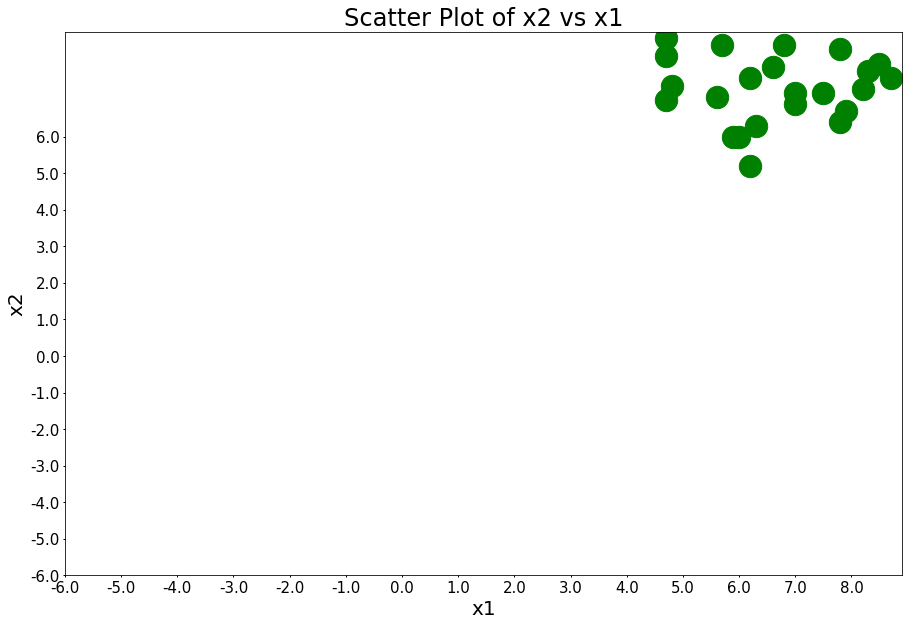

In [784]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

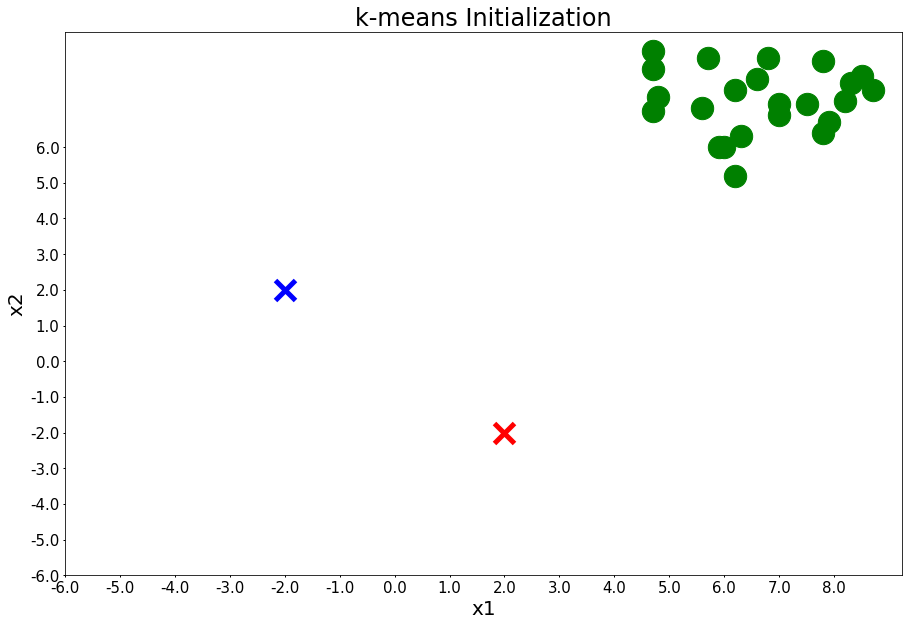

In [785]:
centers = [[-2, 2], [2, -2]]
plot_points(centers, figure_title='k-means Initialization')

Iteration 1 - Press Enter to update the members of each cluster


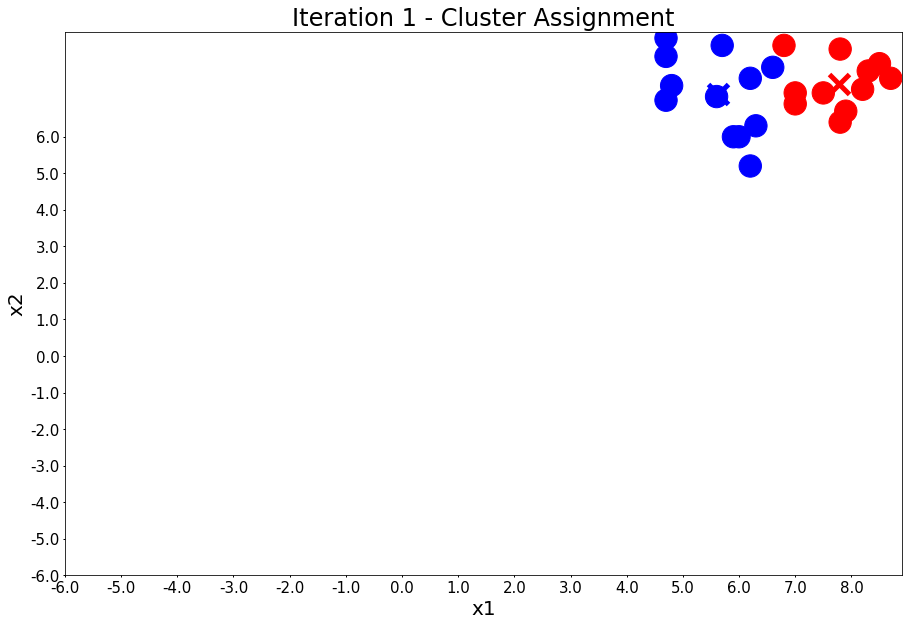

Iteration 1 - Press Enter to update the centers


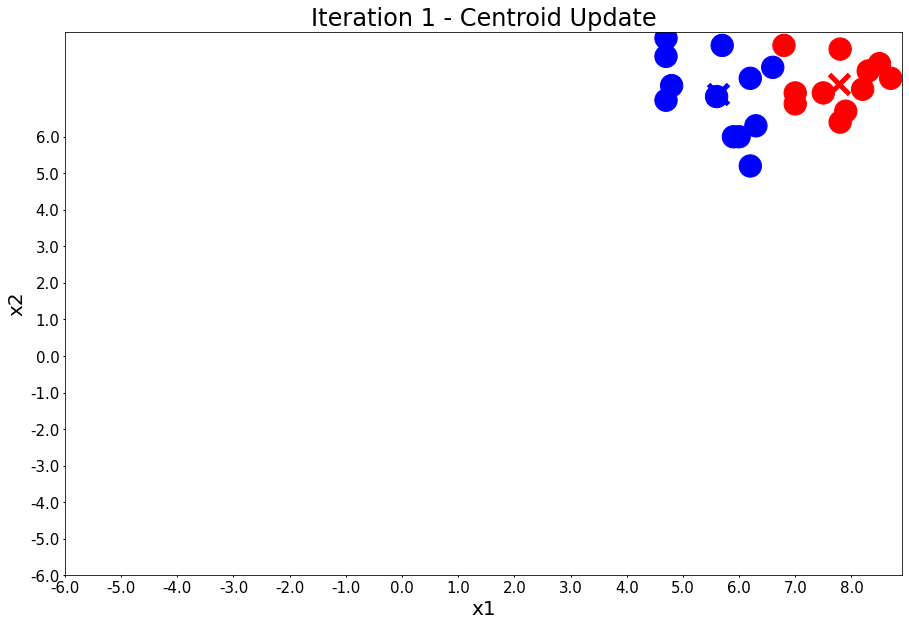

Iteration 2 - Press Enter to update the members of each cluster


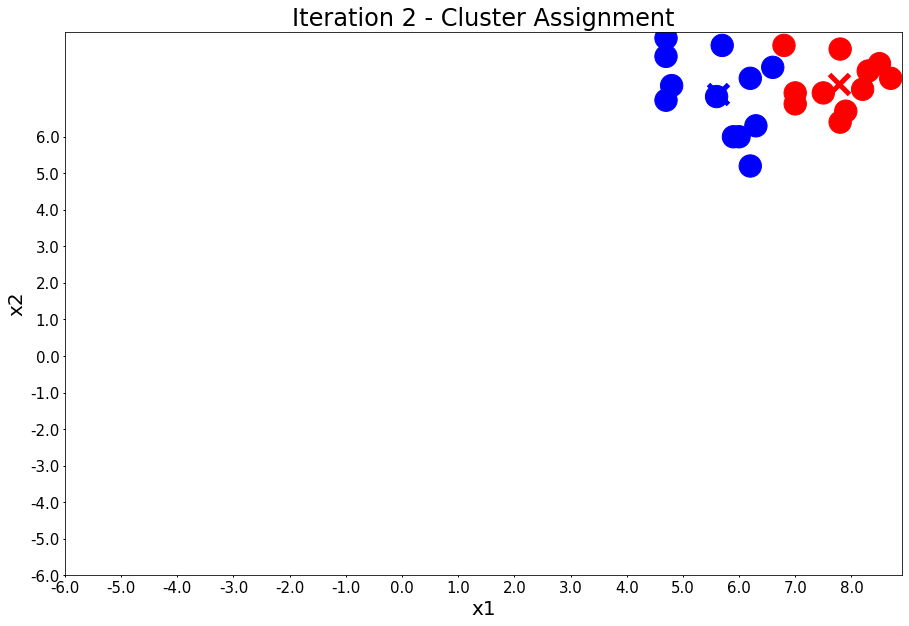

Iteration 2 - Press Enter to update the centers


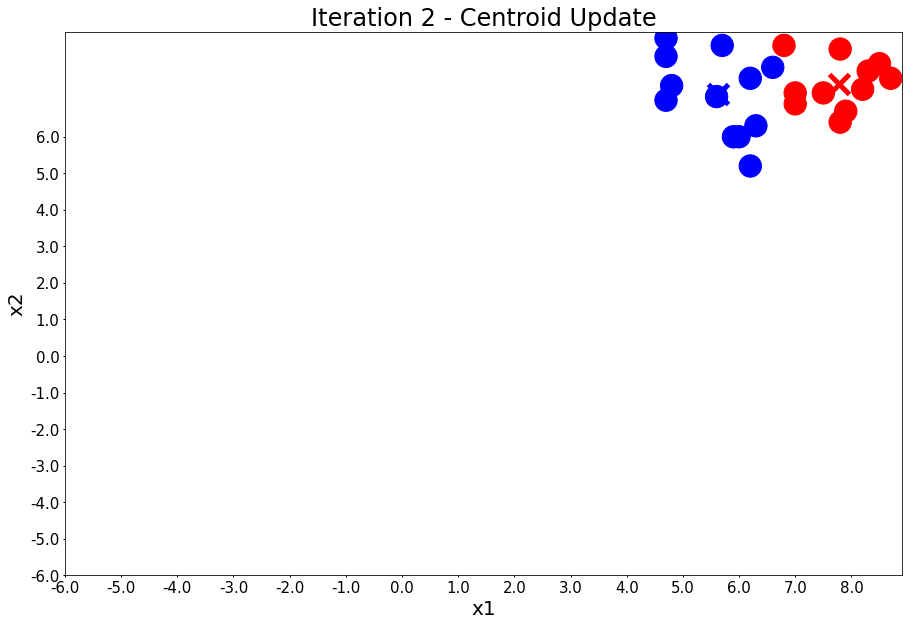

Iteration 3 - Press Enter to update the members of each cluster


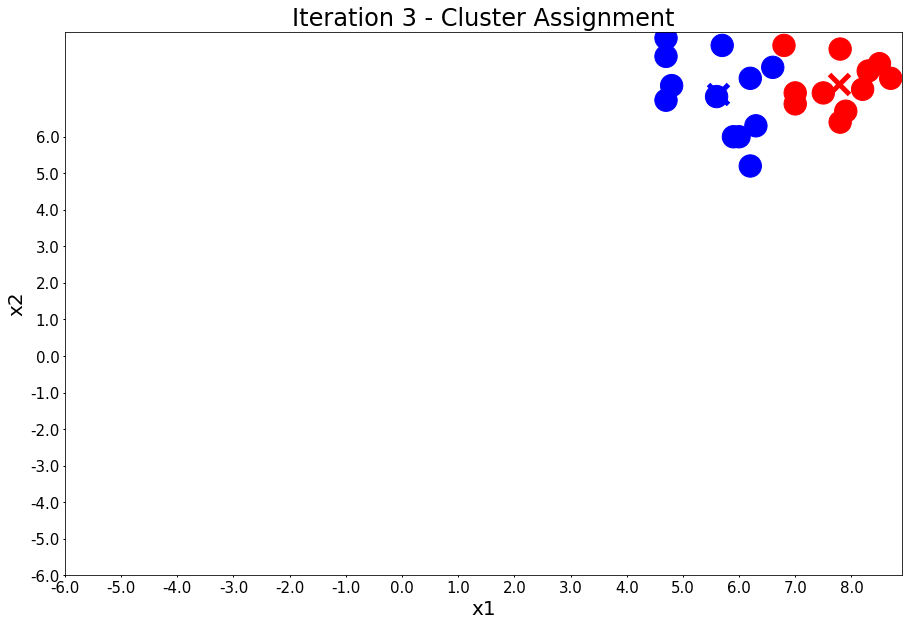

Iteration 3 - Press Enter to update the centers


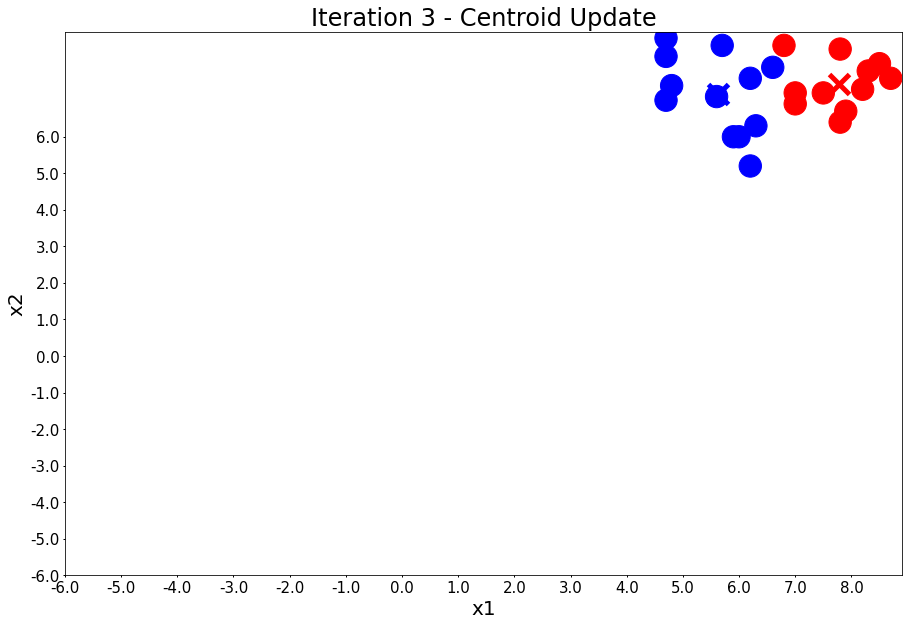

Iteration 4 - Press Enter to update the members of each cluster


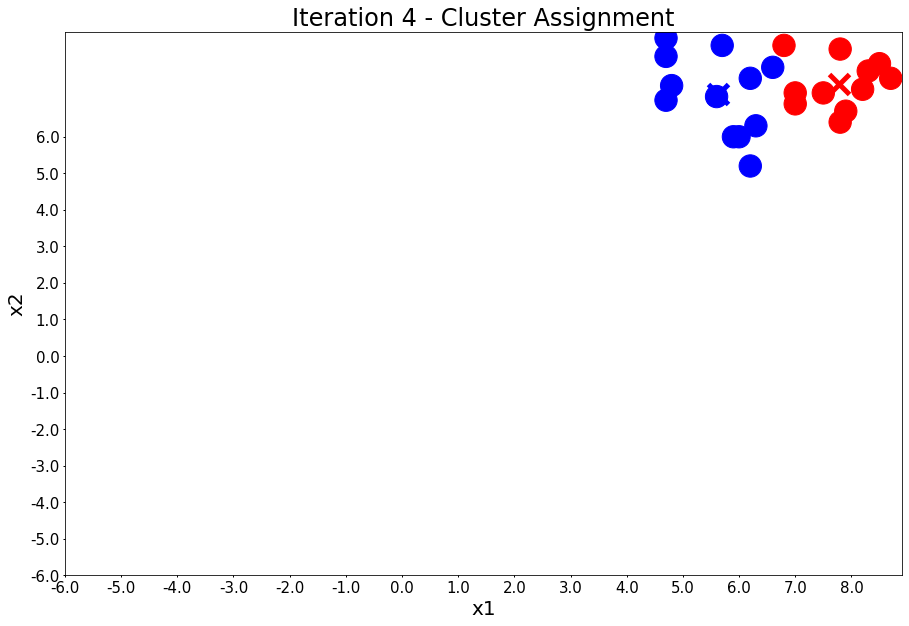

Iteration 4 - Press Enter to update the centers


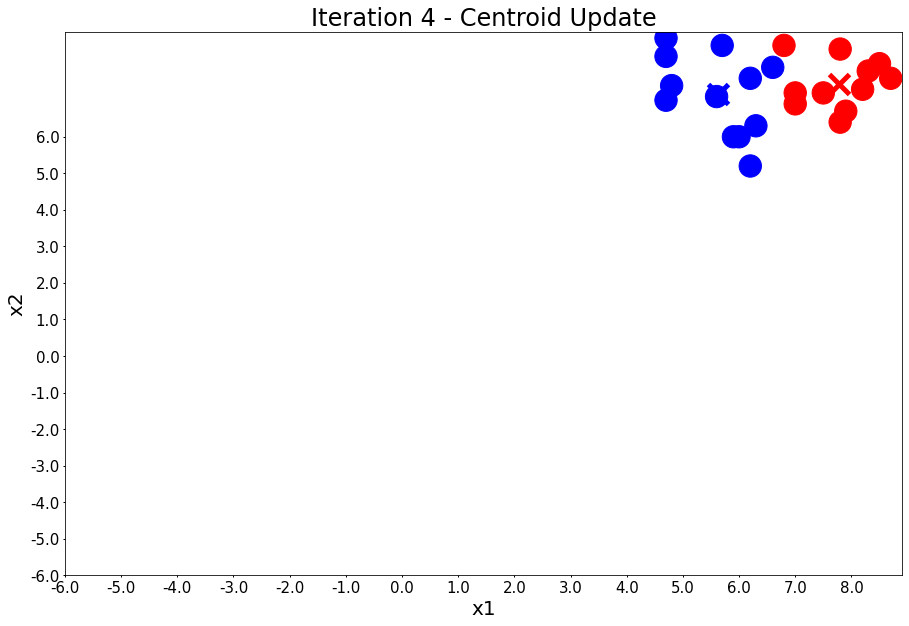

In [794]:
number_of_iterations = 4
for i in range(number_of_iterations):
    input('Iteration {} - Press Enter to update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    input('Iteration {} - Press Enter to update the centers'.format(i + 1))
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)

In [795]:
np.random.seed(0)

In [796]:
X, y = make_blobs(n_samples=5000, centers=[[2, 2], [7, 7], [7, 7], [7, 7]], cluster_std=0.9)

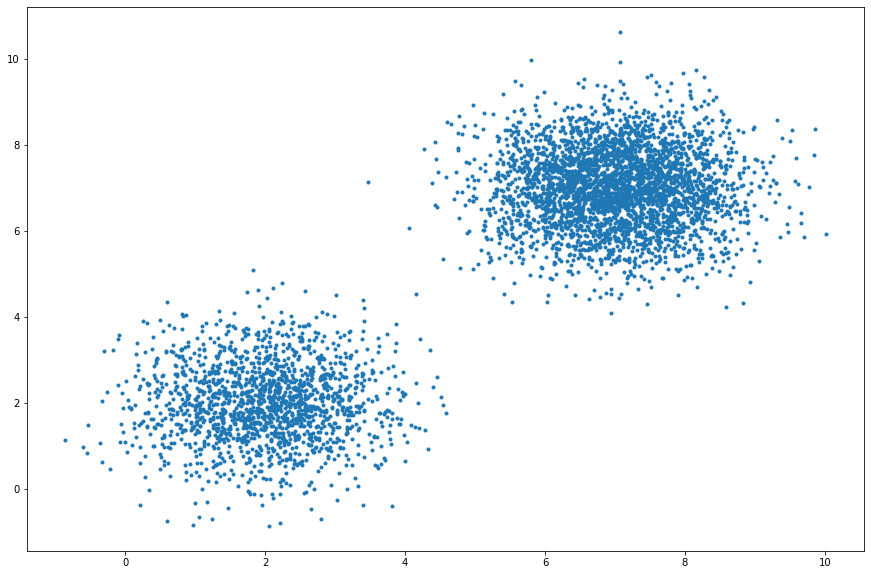

In [791]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [797]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

In [798]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [799]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 2, ..., 1, 0, 0])

In [800]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[7.74716853, 7.57153648],
       [1.97199609, 1.99464156],
       [6.13276223, 7.31435013],
       [7.12957687, 6.0888759 ]])

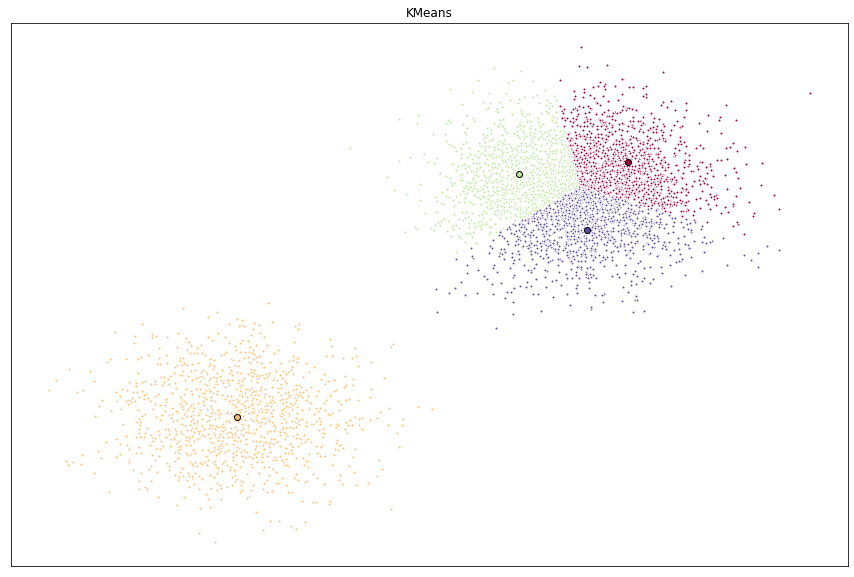

In [802]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(15, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[2, 2], [7, 7], [7, 7], [7, 7]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()

In [809]:
# London Restaurant Categories Split 
lon_dataframe_filtered.groupby('categories').mean()

,lat,lng,distance
categories,,,
Bar,51.503061,-0.107474,1476.000000
Breakfast Spot,51.510180,-0.120549,585.000000
Business Center,51.508338,-0.126434,140.000000
Café,51.502032,-0.127928,806.000000
Chinese Restaurant,51.510529,-0.125625,791.800000
College Cafeteria,51.514102,-0.116841,1063.000000
English Restaurant,51.512625,-0.128347,1171.400000
Fast Food Restaurant,51.508467,-0.125967,172.000000
Filipino Restaurant,51.518231,-0.134451,1302.000000


In [810]:
# Visakhapatnam Restaurant Categories Split 
vsp_dataframe_filtered.groupby('categories').mean()

,lat,lng,distance
categories,,,
Asian Restaurant,17.729427,83.312304,2202.000000
Bar,17.722901,83.308447,1871.500000
Chinese Restaurant,17.731393,83.315568,2313.333333
Coffee Shop,17.713693,83.318068,2066.000000
Dhaba,17.770215,83.370480,9016.000000
Diner,17.740780,83.343754,4913.000000
Food Court,17.719401,83.311488,1158.000000
Indian Chinese Restaurant,17.726034,83.303200,382.000000
Indian Restaurant,17.720529,83.298596,2966.666667


In [811]:
# New York Restaurant Categories Split 
ny_dataframe_filtered.groupby('categories').mean()

,lat,lng,distance
categories,,,
American Restaurant,40.720642,-74.005212,885.500000
Asian Restaurant,40.713954,-73.993579,1058.000000
Bakery,40.721385,-73.983949,2096.000000
Cantonese Restaurant,40.713875,-73.997280,748.000000
Chinese Restaurant,40.714622,-73.999593,874.176471
Dim Sum Restaurant,40.714465,-73.997568,745.000000
Diner,40.711512,-73.990929,2783.000000
Italian Restaurant,40.719110,-74.001339,1072.200000
Lounge,40.707970,-74.013779,842.000000
